In [1]:
from myData import down_sampling, metrics_table
from Preprocess import get_data
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
X,y= get_data('diabetic_data.csv',labelEncode=False, skewness=False)
df = pd.concat([X,y], axis=1)
df.columns

Original data shape (101766, 50)
Process Missing data
Delete multipule encounters
Transform features
Data shape after preprocessing: (69973, 42)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_1_group',
       'diag_2_group', 'diag_3_group', 'readmitted'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_group,diag_2_group,diag_3_group,readmitted
0,Caucasian,Female,[50-60),2,1,1,8,77,6,33,0,0,0,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Circulatory,Injury,Digestive,1
1,Caucasian,Female,[50-60),3,1,1,2,49,1,11,0,0,0,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Musculoskeletal,Other,Digestive,0
2,Caucasian,Female,[80-90),1,3,7,4,68,2,23,0,0,0,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Injury,Respiratory,Other,0
3,Caucasian,Female,[80-90),1,1,7,3,46,0,20,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,Other,Circulatory,Circulatory,0
4,AfricanAmerican,Female,[30-40),1,1,7,5,49,0,5,0,0,0,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Genitourinary,Neoplasms,Digestive,0


Text(0.5, 1.0, 'Race')

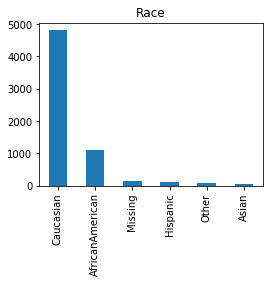

In [4]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'race'].value_counts().plot(kind='bar')


plt.title('Race')

Text(0.5, 1.0, 'gender')

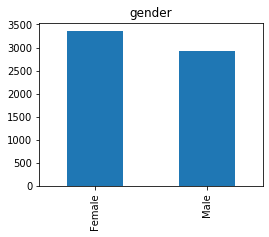

In [5]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'gender'].value_counts().plot(kind='bar')
plt.title('gender')

Text(0.5, 1.0, 'Age')

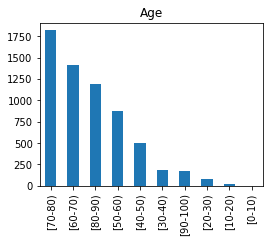

In [6]:
df.loc[df['readmitted'].isin(['1','Yes',1]),'age'].value_counts().plot(kind='bar')
plt.title("Age")

Text(0.5, 1.0, 'discharge_disposition_id')

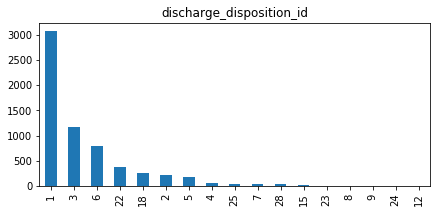

In [8]:
plt.rcParams['figure.figsize']= [7.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'discharge_disposition_id'].value_counts().plot(kind='bar')
plt.title("discharge_disposition_id")

Text(0.5, 1.0, 'admission_source_id')

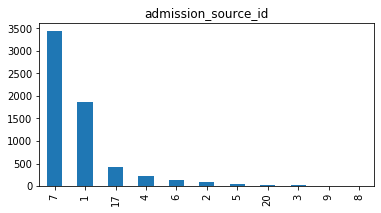

In [9]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'admission_source_id'].value_counts()[:25].plot(kind='bar')
plt.title("admission_source_id")

Text(0.5, 1.0, 'time_in_hospital')

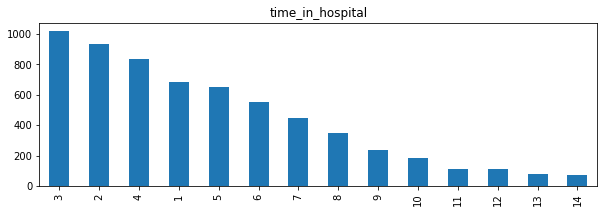

In [10]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'time_in_hospital'].value_counts()[:25].plot(kind='bar')
plt.title("time_in_hospital")

Text(0.5, 1.0, 'num_lab_procedures')

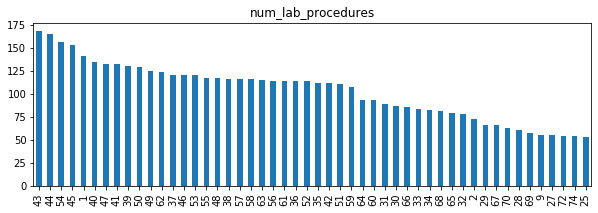

In [11]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'num_lab_procedures'].value_counts()[:50].plot(kind='bar')
plt.title("num_lab_procedures")

Text(0.5, 1.0, 'num_procedures')

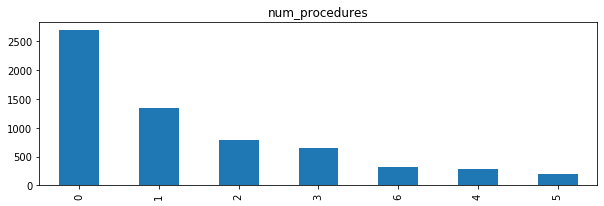

In [12]:
#plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'num_procedures'].value_counts().plot(kind='bar')
plt.title("num_procedures")

Text(0.5, 1.0, 'num_medications')

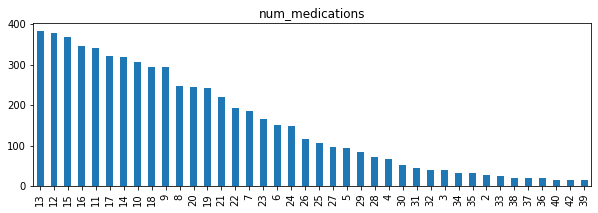

In [13]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'num_medications'].value_counts()[:40].plot(kind='bar')
plt.title("num_medications")

Text(0.5, 1.0, 'number_emergency')

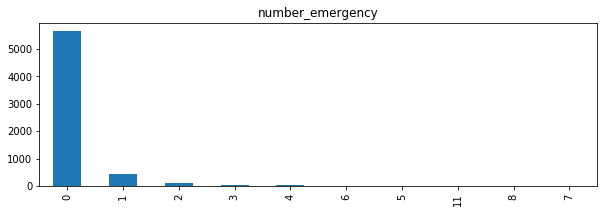

In [14]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'number_emergency'].value_counts().plot(kind='bar')
plt.title("number_emergency")

Text(0.5, 1.0, 'number_inpatient')

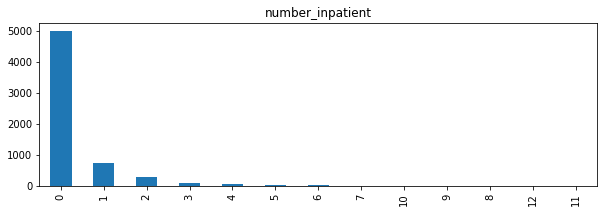

In [15]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'number_inpatient'].value_counts().plot(kind='bar')
plt.title("number_inpatient")

Text(0.5, 1.0, 'number_outpatient')

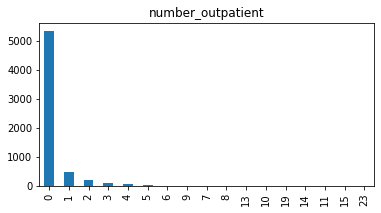

In [16]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'number_outpatient'].value_counts().plot(kind='bar')
plt.title("number_outpatient")

Text(0.5, 1.0, 'number_diagnoses')

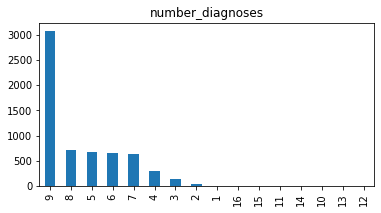

In [17]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'number_diagnoses'].value_counts().plot(kind='bar')
plt.title("number_diagnoses")

Text(0.5, 1.0, 'number_outpatient')

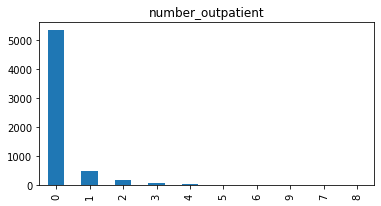

In [18]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'number_outpatient'].value_counts()[:10].plot(kind='bar')
plt.title("number_outpatient")

## Modeling

In [8]:
X,Y= get_data('diabetic_data.csv',labelEncode=True, skewness=True)

Original data shape (101766, 50)
Process Missing data
Delete multipule encounters
Transform features
Reduce skewness
Conduce label encoding
Data shape after preprocessing: (69973, 42)


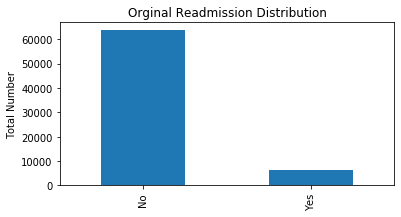

In [5]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
Y.value_counts()[:10].plot(kind='bar')
plt.title("Orginal Readmission Distribution")
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Total Number')
#plt.xlabel('Readmission')
plt.savefig('readmission_dist.png')

In [9]:
if Y.dtype=='object':
    Y = Y.apply(lambda x: int(x=='Yes'))
X_train, X_test, y_train, y_test = ms.train_test_split(X, Y,  test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(55978, 42) (13995, 42)


In [10]:
X_train, y_train = down_sampling(X_train, y_train, sampling_ratio = 1)
print(X_train.shape)

(10036, 42)


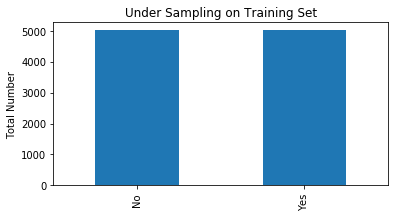

In [34]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
y_train.value_counts()[:10].plot(kind='bar')
plt.title("Under Sampling on Training Set")
plt.xticks([0,1], ['No', 'Yes'])

#plt.xlabel('Readmission')
plt.ylabel('Total Number')
plt.savefig('readmission_down.png')


In [11]:
X_train, X_train_lr, y_train, y_train_lr = ms.train_test_split(
    X_train, y_train, test_size=0.5)

print(X_train.shape, X_train_lr.shape, X_test.shape)

(5018, 42) (5018, 42) (13995, 42)


In [36]:
y_train.value_counts()/y_train.shape[0]

0    0.502391
1    0.497609
Name: readmitted, dtype: float64

In [37]:
y_train_lr.value_counts()/y_train_lr.shape[0]

1    0.502391
0    0.497609
Name: readmitted, dtype: float64

In [38]:
y_test.value_counts()/y_test.shape[0]

0    0.910039
1    0.089961
Name: readmitted, dtype: float64

In [39]:
plt.rcParams['figure.figsize']= [6.0, 4.0]

## Random Forest + Logistic Regression

In [18]:
# Random Forest + Logistic Regression

n_estimator = 28
rf = RandomForestClassifier(max_depth=7, max_features=5, n_estimators=n_estimator,n_jobs=-1, random_state=42)
rf_enc = OneHotEncoder(categories='auto',sparse=False, handle_unknown='ignore')
rf_lm = LogisticRegression(solver='saga', max_iter=1000, C=0.00397, random_state=42)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)



LogisticRegression(C=0.00397, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

#### RF + LR Grid Search CV

In [43]:
grid_param = {'n_estimators':range(20,44,2), 'max_depth':range(4,8), \
                                  'max_features':range(4,8)}
rf_grid_cv = ms.GridSearchCV(rf,  grid_param,cv=5, n_jobs= -1, scoring='roc_auc',return_train_score=True)
rf_grid_cv.fit(X_train, y_train)
rf = rf_grid_cv.best_estimator_
print(rf)

rf_enc.fit(rf.apply(X_train))
grid_param = {'C':np.linspace(0.1,0.001, 101)}
rf_lm_grid_cv = ms.GridSearchCV(rf_lm, grid_param, n_jobs= -1, scoring='roc_auc', cv=5,return_train_score=True)
rf_lm_grid_cv.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
rf_lm = rf_lm_grid_cv.best_estimator_
print(rf_lm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
LogisticRegression(C=0.003970000000000001, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


rf auc:  0.6234388782674293
rf_lm auc:  0.633147057268072


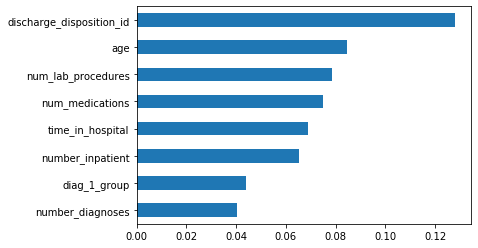

In [44]:
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_rf = rf.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print('rf auc: ', auc_rf)

y_proba_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
y_rf_lm = rf_lm.predict(rf_enc.transform(rf.apply(X_test)))
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_proba_rf_lm)
auc_rf_lm = auc(fpr_rf_lm, tpr_rf_lm)
print('rf_lm auc: ', auc_rf_lm)

pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()[-8:].plot(kind='barh')


In [45]:

plt.savefig('feature_rf.png',bbox_inches='tight')
print('\n{:^60}\n{}'.format('Classification Report on All Quantile Groups', \
                              classification_report(y_test, y_rf_lm)))


        Classification Report on All Quantile Groups        
              precision    recall  f1-score   support

           0       0.94      0.57      0.71     12736
           1       0.13      0.63      0.21      1259

    accuracy                           0.58     13995
   macro avg       0.53      0.60      0.46     13995
weighted avg       0.87      0.58      0.67     13995



<Figure size 432x288 with 0 Axes>

In [46]:
result = metrics_table(y_test, y_proba_rf_lm)
print('{}\n{:^80}\n{}'.format('','Gain/Lift Chart',result))



                                Gain/Lift Chart                                 
  quantile  amount  readmitted       min       max  pct_readmitted      lift
0        1    1400          62  0.284831  0.368945        0.044286  0.492286
1        2    1399          73  0.368945  0.400513        0.052180  0.580041
2        3    1400          87  0.400523  0.425351        0.062143  0.690788
3        4    1399          85  0.425358  0.452065        0.060758  0.675390
4        5    1400          96  0.452092  0.482744        0.068571  0.762249
5        6    1399         123  0.482754  0.514596        0.087920  0.977330
6        7    1399         136  0.514607  0.546505        0.097212  1.080625
7        8    1400         174  0.546513  0.573697        0.124286  1.381576
8        9    1399         186  0.573699  0.604099        0.132952  1.477913
9       10    1400         237  0.604174  0.715917        0.169286  1.881802


## Logistic Regression with Feature Transform From Gradient Boosting Model

In [6]:
n_estimator = 100
grd = GradientBoostingClassifier(n_estimators=n_estimator,random_state=42, learning_rate=0.09)
grd_enc = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
grd_lm = LogisticRegression(solver='saga', max_iter=1000, C=0.00199, random_state=42)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

LogisticRegression(C=0.00199, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

#### GB + LR Grid Search CV

In [7]:
grid_param = {'n_estimators':range(40,150,10), 'learning_rate':np.linspace(.05, .25, 21)}
grid_grid_cv = ms.GridSearchCV(grd, grid_param, cv=5, n_jobs=-1, scoring='roc_auc')
grid_grid_cv.fit(X_train, y_train)
grd = grid_grid_cv.best_estimator_

grd_enc.fit(grd.apply(X_train)[:, :, 0])
grid_param = {'C':np.linspace(0.1,0.001, 101)}
grd_lm_grid_cv = ms.GridSearchCV(grd_lm, grid_param, cv=5, n_jobs=-1, scoring='roc_auc')
grd_lm_grid_cv.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
grd_lm = grd_lm_grid_cv.best_estimator_

#### GB +LR Best Model 

GB AUC:  0.6394902680599184
GB + LR AUC:  0.648644957312376

       Classification Report on the Whole Population        
              precision    recall  f1-score   support

           0       0.94      0.63      0.75     12736
           1       0.13      0.58      0.22      1259

    accuracy                           0.63     13995
   macro avg       0.54      0.61      0.49     13995
weighted avg       0.87      0.63      0.71     13995


                                Gain/Lift Chart                                 
  quantile  amount  readmitted       min       max  pct_readmitted      lift
0        1    1401          57  0.298512  0.361645        0.040685  0.452262
1        2    1398          73  0.361675  0.385588        0.052217  0.580455
2        3    1400          75  0.385592  0.405330        0.053571  0.595506
3        4    1399          90  0.405374  0.426666        0.064332  0.715118
4        5    1400         101  0.426668  0.453703        0.072143  0.801948
5      

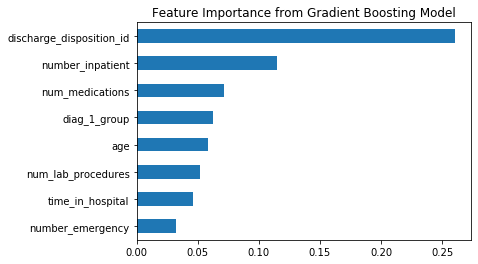

In [10]:
y_proba_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_proba_grd)
auc_grd = auc(fpr_grd, tpr_grd)
y_pred_grd = grd.predict(X_test)

y_proba_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_proba_grd_lm)
auc_grd_lm = auc(fpr_grd_lm, tpr_grd_lm)
y_grd_lm = grd_lm.predict(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))

print('GB AUC: ',auc_grd)
print("GB + LR AUC: ", auc_grd_lm)
pd.Series(grd.feature_importances_, index=X_train.columns).sort_values()[-8:].plot(kind='barh')

plt.title('Feature Importance from Gradient Boosting Model')
#plt.xlabel('Importance')
#plt.ylabel('Features')
plt.savefig('grd_features.png', bbox_inches='tight')

print('\n{:^60}\n{}'.format('Classification Report on the Whole Population',\
                            classification_report(y_test, y_grd_lm)))

result=metrics_table(y_test, y_proba_grd_lm)
print('{}\n{:^80}\n{}'.format('','Gain/Lift Chart',result))
#result.append(regroup_lift(result,5), ignore_index=True)

In [11]:
result.sort_values(by='quantile',ascending=False)#.to_csv('grd_lr.csv')

,quantile,amount,readmitted,min,max,pct_readmitted,lift
9,10,1400,286,0.629205,0.800352,0.204286,2.270864
8,9,1399,187,0.582928,0.629204,0.133667,1.485857
7,8,1400,151,0.540036,0.582880,0.107857,1.198953
6,7,1399,122,0.495535,0.540003,0.087205,0.969383
5,6,1399,117,0.453724,0.495533,0.083631,0.929654
4,5,1400,101,0.426668,0.453703,0.072143,0.801948
3,4,1399,90,0.405374,0.426666,0.064332,0.715118
2,3,1400,75,0.385592,0.405330,0.053571,0.595506
1,2,1398,73,0.361675,0.385588,0.052217,0.580455
0,1,1401,57,0.298512,0.361645,0.040685,0.452262


## Reduced Linear Model

In [16]:
# Linear model

X_train = pd.concat([X_train,X_train_lr], axis=0)
y_train = pd.concat([y_train, y_train_lr], axis =0)

X_train.shape

(15054, 42)

In [25]:
# Reduced model

X_train = X_train[['discharge_disposition_id','number_inpatient','age','num_medications','diag_1_group']]

X_test = X_test[['discharge_disposition_id','number_inpatient','age','num_medications','diag_1_group']]
print(X_train.shape, X_test.shape)

enc1 = OneHotEncoder(categories='auto', sparse=True, handle_unknown='ignore')
enc1.fit(X_train)

lm = LogisticRegression(solver='saga', class_weight='balanced',max_iter=1000, C=0.05743, penalty='l2', n_jobs=-1, random_state=42)
lm.fit(enc1.transform(X_train), y_train)

(15054, 5) (13995, 5)


LogisticRegression(C=0.05743, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
grid_param = {'C':np.linspace(0.1,0.001, 101)}
lm_grid_cv = ms.GridSearchCV(lm, grid_param, cv=5, n_jobs=-1, scoring='roc_auc')
lm_grid_cv.fit(enc1.transform(X_train), y_train)
lm = lm_grid_cv.best_estimator_
print(lm)

LogisticRegression(C=0.05743000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [14]:
y_proba_lm = lm.predict_proba(
    enc1.transform(X_test))[:, 1]

y_lm = lm.predict(enc1.transform(X_test))

fpr_lm, tpr_lm, _ = roc_curve(y_test, y_proba_lm)
auc_lm = auc(fpr_lm, tpr_lm)
print(auc_lm)
print('\n{:^60}\n{}'.format('Classification Report on the Whole Population',\
    classification_report(y_test, y_lm)))

0.646443346597962

       Classification Report on the Whole Population        
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     12736
           1       0.14      0.54      0.23      1259

    accuracy                           0.67     13995
   macro avg       0.54      0.61      0.51     13995
weighted avg       0.87      0.67      0.74     13995



In [16]:
result=metrics_table(y_test, y_proba_lm)
print('{}\n{:^80}\n{}'.format('','Gain/Lift Chart',result))


                                Gain/Lift Chart                                 
  quantile  amount  readmitted       min       max  pct_readmitted      lift
0        1    1403          58  0.287285  0.370730        0.041340  0.459512
1        2    1397          69  0.370766  0.390969        0.049392  0.549009
2        3    1399          92  0.390998  0.410338        0.065761  0.730966
3        4    1403          95  0.410415  0.428831        0.067712  0.752650
4        5    1406          94  0.428848  0.449776        0.066856  0.743138
5        6    1389          99  0.449839  0.477560        0.071274  0.792246
6        7    1399         129  0.477585  0.518996        0.092209  1.024941
7        8    1401         151  0.519050  0.568911        0.107780  1.198024
8        9    1398         178  0.568995  0.619659        0.127325  1.415271
9       10    1400         294  0.619706  0.904851        0.210000  2.334243


In [17]:
result.sort_values(by='quantile', ascending=False)

,quantile,amount,readmitted,min,max,pct_readmitted,lift
9,10,1400,294,0.619706,0.904851,0.210000,2.334243
8,9,1398,178,0.568995,0.619659,0.127325,1.415271
7,8,1401,151,0.519050,0.568911,0.107780,1.198024
6,7,1399,129,0.477585,0.518996,0.092209,1.024941
5,6,1389,99,0.449839,0.477560,0.071274,0.792246
4,5,1406,94,0.428848,0.449776,0.066856,0.743138
3,4,1403,95,0.410415,0.428831,0.067712,0.752650
2,3,1399,92,0.390998,0.410338,0.065761,0.730966
1,2,1397,69,0.370766,0.390969,0.049392,0.549009
0,1,1403,58,0.287285,0.370730,0.041340,0.459512


In [14]:
result.to_csv('lr.csv')

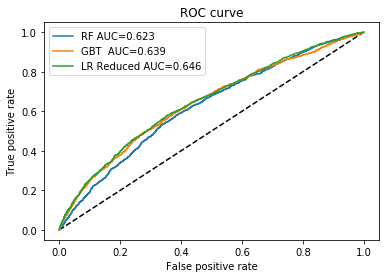

In [60]:

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF AUC={:.3f}'.format(auc_rf))
plt.plot(fpr_grd, tpr_grd, label='GBT  AUC={:.3f}'.format(auc_grd))
plt.plot(fpr_lm, tpr_lm, label='LR Reduced AUC={:.3f}'.format(auc_lm))
#plt.plot(fpr_full_lm, tpr_full_lm, label='LR Full AUC={:.3f}'.format(auc_lm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

plt.savefig('roc.png',bbox_inches='tight')
